In [92]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B' , 'LSTAT', 'MEDV']
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [93]:
import numpy as np

cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)



<Axes: >

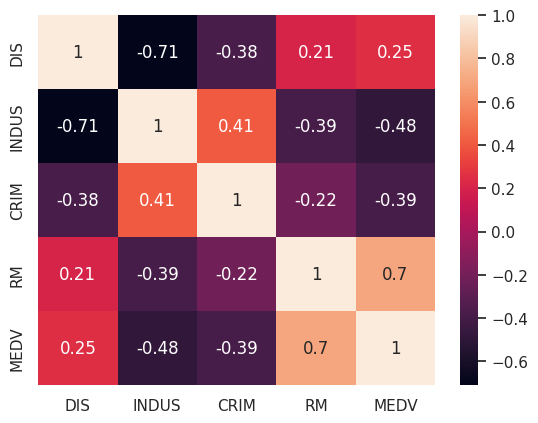

In [94]:
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

sns.heatmap(cm, cbar=True, annot=True, xticklabels=cols, yticklabels=cols)

In [95]:
x = df[['RM', 'INDUS']].values
x

array([[ 6.575,  2.31 ],
       [ 6.421,  7.07 ],
       [ 7.185,  7.07 ],
       ...,
       [ 6.976, 11.93 ],
       [ 6.794, 11.93 ],
       [ 6.03 , 11.93 ]])

In [96]:
# Variables de correlación más alta: RM; INDUS

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# x = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std= sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

In [97]:
# Análisis de resultados, gráfico de tres dimensiones

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np


In [98]:
x1_range = np.arange(df['RM'].min(), df['RM'].max())
x1_range

array([3.561, 4.561, 5.561, 6.561, 7.561, 8.561])

In [99]:
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())
x2_range

array([ 0.46,  1.46,  2.46,  3.46,  4.46,  5.46,  6.46,  7.46,  8.46,
        9.46, 10.46, 11.46, 12.46, 13.46, 14.46, 15.46, 16.46, 17.46,
       18.46, 19.46, 20.46, 21.46, 22.46, 23.46, 24.46, 25.46, 26.46,
       27.46])

In [100]:
x1, x2 = np.meshgrid(x1_range, x2_range)
x1, x2

(array([[3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.561, 4.561, 5.561, 6.561, 7.561, 8.561],
        [3.5

In [101]:
plano = pd.DataFrame({'RM': x1.ravel(), 'INDUS' : x2.ravel()})
plano

,RM,INDUS
0,3.561,0.46
1,4.561,0.46
2,5.561,0.46
3,6.561,0.46
4,7.561,0.46
...,...,...
163,4.561,27.46
164,5.561,27.46
165,6.561,27.46
166,7.561,27.46


In [102]:
pred = slr.predict(plano).reshape(x1.shape)
pred = sc_y.inverse_transform(pred)
pred

/home/jordi/entornos/entorno_sic/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 41.02916025,  46.51963684,  52.01011343,  57.50059002,
         62.99106661,  68.4815432 ],
       [ 38.73517499,  44.22565158,  49.71612818,  55.20660477,
         60.69708136,  66.18755795],
       [ 36.44118974,  41.93166633,  47.42214292,  52.91261951,
         58.4030961 ,  63.89357269],
       [ 34.14720448,  39.63768108,  45.12815767,  50.61863426,
         56.10911085,  61.59958744],
       [ 31.85321923,  37.34369582,  42.83417241,  48.324649  ,
         53.81512559,  59.30560219],
       [ 29.55923397,  35.04971057,  40.54018716,  46.03066375,
         51.52114034,  57.01161693],
       [ 27.26524872,  32.75572531,  38.2462019 ,  43.73667849,
         49.22715508,  54.71763168],
       [ 24.97126346,  30.46174006,  35.95221665,  41.44269324,
         46.93316983,  52.42364642],
       [ 22.67727821,  28.1677548 ,  33.65823139,  39.14870798,
         44.63918457,  50.12966117],
       [ 20.38329296,  25.87376955,  31.36424614,  36.85472273,
         42.34519932,  47.8

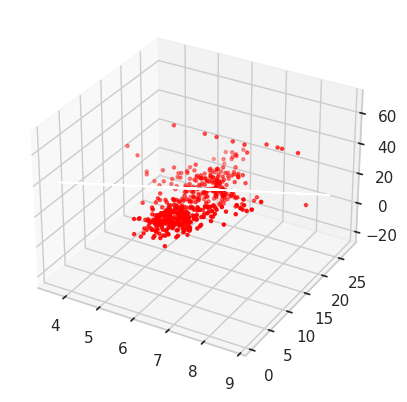

In [103]:
fig = plt.figure()
#ax = fig.gca()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], marker='.', color='red')
plt.show()

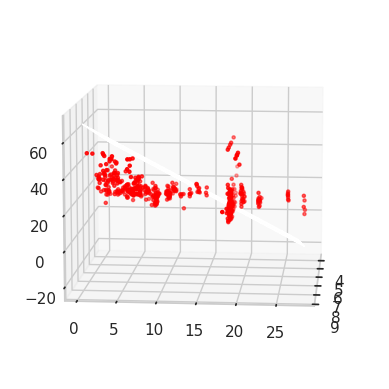

In [104]:
fig = plt.figure()
#ax = fig.gca()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], marker='.', color='red')
ax.view_init(elev=10, azim=5)
plt.show()